In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
desktop_path_cases = os.path.join(r"C:\Users\meggn\OneDrive\Documents\CIS 550-AML\Final Project\CONVENIENT_global_deaths.csv")
desktop_path_deaths = os.path.join(r"C:\Users\meggn\OneDrive\Documents\CIS 550-AML\Final Project\CONVENIENT_global_confirmed_cases.csv")
df_cases = pd.read_csv(desktop_path_cases,delimiter=',', na_values="?", header=None)
df_deaths = pd.read_csv(desktop_path_deaths,delimiter=',', na_values="?", header=None)

In [3]:
df_cases.shape

(1144, 290)

In [4]:
df_cases.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_deaths.shape

(1144, 290)

In [6]:
df_deaths.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
0,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df_cases.iloc[0,1:].index
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df_cases[2:][i]).sum())
world["Cases"]=cases
world["Country"] = df_cases.iloc[0,1:].values

In [8]:
world.head()

,Country,Cases
0,Afghanistan,7896.0
1,Albania,3598.0
2,Algeria,6881.0
3,Andorra,165.0
4,Angola,1933.0


In [9]:
world.Country.unique

<bound method Series.unique of 0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country, Length: 289, dtype: object>

In [10]:
world.describe()

,Cases
count,2.890000e+02
mean,2.381240e+04
std,9.355568e+04
min,0.000000e+00
25%,6.600000e+01
50%,9.520000e+02
75%,8.727000e+03
max,1.123836e+06


In [11]:
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])

In [12]:
world.head()

,Country,Cases,Cases Range
0,Afghanistan,7896.0,U50K
1,Albania,3598.0,U50K
2,Algeria,6881.0,U50K
3,Andorra,165.0,U50K
4,Angola,1933.0,U50K


In [14]:
desktop_path_continent = os.path.join(r"C:\Users\meggn\OneDrive\Documents\CIS 550-AML\Final Project\continents2.csv")
df_continent = pd.read_csv(desktop_path_continent,delimiter=',', na_values="?", header=None)

In [15]:
df_continent.head()

,0,1,2,3,4,5,6,7,8,9,10
0,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
1,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142,34,NaN
2,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150,154,NaN
3,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150,39,NaN
4,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2,15,NaN


In [22]:
continent = pd.DataFrame({"Country":[],"alpha":[]})
continent["Country"] = df_continent.iloc[1:,0].values
continent["alpha"] = df_continent.iloc[1:,2].values
continent["Country"]=continent["Country"].str.upper()

In [23]:
continent.head

<bound method NDFrame.head of                Country alpha
0          AFGHANISTAN   AFG
1        ÅLAND ISLANDS   ALA
2              ALBANIA   ALB
3              ALGERIA   DZA
4       AMERICAN SAMOA   ASM
..                 ...   ...
244  WALLIS AND FUTUNA   WLF
245     WESTERN SAHARA   ESH
246              YEMEN   YEM
247             ZAMBIA   ZMB
248           ZIMBABWE   ZWE

[249 rows x 2 columns]>

In [24]:
alpha =[]
for i in world["Country"].str.upper().values:
    if len(continent[continent["Country"]==i]["alpha"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["Country"]==i]["alpha"].values[0])
world["alpha"]=alpha

In [25]:
world.head()

,Country,Cases,Cases Range,alpha
0,Afghanistan,7896.0,U50K,AFG
1,Albania,3598.0,U50K,ALB
2,Algeria,6881.0,U50K,DZA
3,Andorra,165.0,U50K,AND
4,Angola,1933.0,U50K,AGO


In [26]:
fig = px.choropleth(world.dropna(),
                   locations="alpha",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["blue","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

KeyError: '800Kto1.5M'

In [27]:
world_cases = pd.DataFrame({"Date":[],"Cases":[]})
world_cases["Date"] = df_cases.iloc[2:,0].index
cases = []
for i in range(2,len(df_cases)):
    cases.append(sum(pd.to_numeric(df_cases.iloc[i,1:].values)))
world_cases["Cases"]=cases
world_cases["Date"] = df_cases.iloc[2:,0].values

In [28]:
world_cases.head()

,Date,Cases
0,1/23/20,1.0
1,1/24/20,8.0
2,1/25/20,16.0
3,1/26/20,14.0
4,1/27/20,26.0


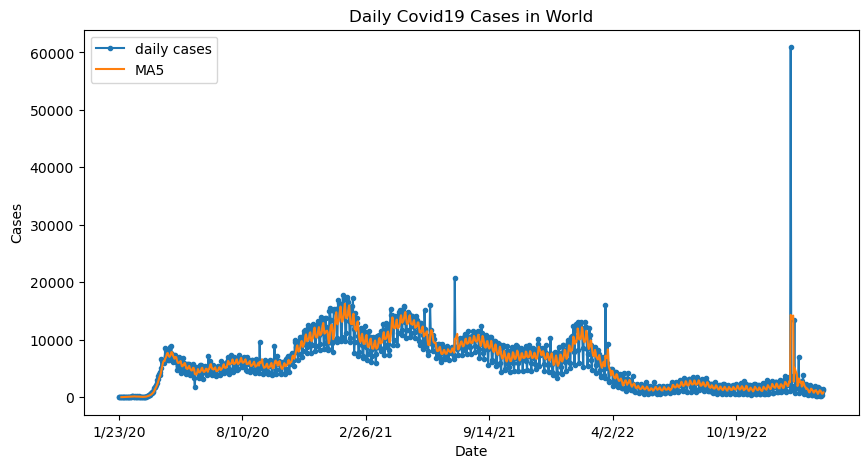

In [29]:
world_cases = world_cases.set_index("Date")
world_cases.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(10,5),label="daily cases")
world_cases.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

In [30]:
world_deaths = pd.DataFrame({"Date":[],"Deaths":[]})
world_deaths["Date"] = df_deaths.iloc[2:,0].index
deaths = []
for i in range(2,len(df_deaths)):
    deaths.append(sum(pd.to_numeric(df_deaths.iloc[i,1:].values)))
world_deaths["Deaths"]=deaths
world_deaths["Date"] = df_deaths.iloc[2:,0].values

In [31]:
world_deaths.head()

,Date,Deaths
0,1/23/20,100.0
1,1/24/20,287.0
2,1/25/20,493.0
3,1/26/20,683.0
4,1/27/20,809.0


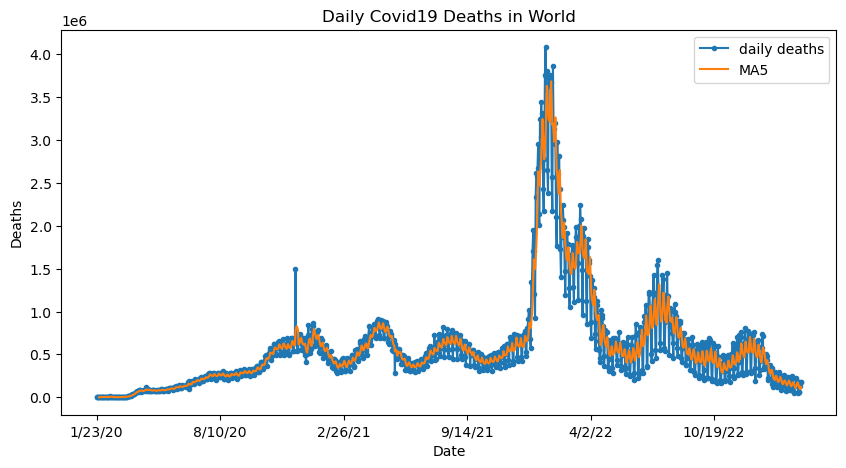

In [32]:
world_deaths = world_deaths.set_index("Date")
world_deaths.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
world_deaths.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [33]:
print(world_cases.columns)

Index(['Cases'], dtype='object')


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15734.072, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16253.777, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16252.912, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16249.601, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16251.778, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16008.813, Time=1.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15954.604, Time=1.58 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15678.045, Time=2.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15892.734, Time=1.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=15525.055, Time=3.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15804.569, Time=1.26 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=15386.405, Time=3.37 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=15588.973, Time=1.10 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=15394.691, Time=2.98 sec
 ARIMA(4,1,3)(0,0,0

C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

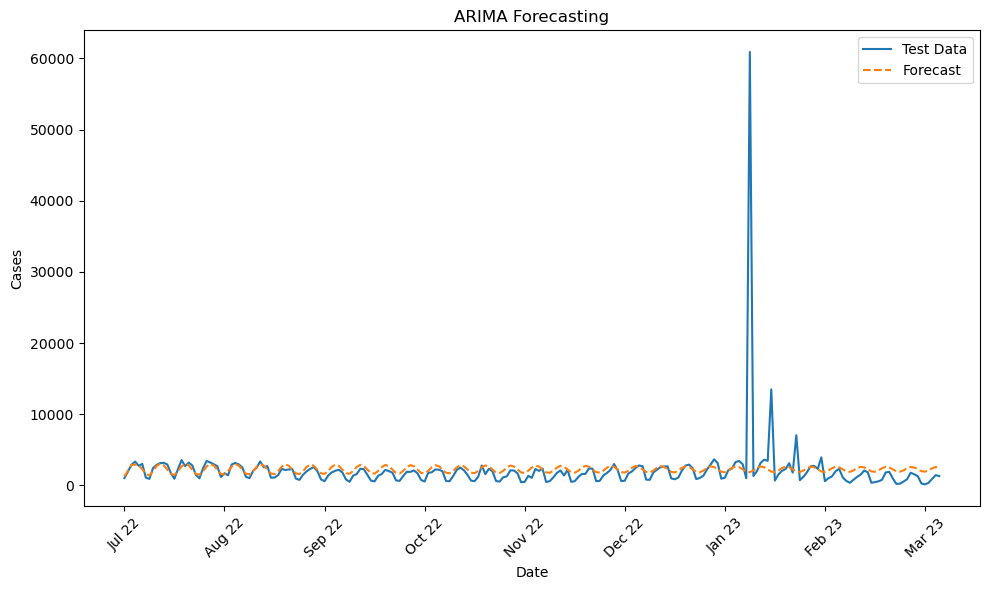

R2 Score: 0.002721994676161077


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
 
# Assuming you have your COVID-19 data loaded into the DataFrame 'df_cases' and 'df_deaths'
 
# Corrected code for daily cases
count_cases = []
for i in range(1, len(df_cases)):
    numeric_values = pd.to_numeric(df_cases.iloc[i, 1:], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
    numeric_values = numeric_values.dropna()  # Drop NaN values
    count_cases.append(numeric_values.sum())  # Sum only numeric values
 
df_cases_daily = pd.DataFrame()
df_cases_daily["Date"] = df_cases.iloc[1:, 0]  # Assuming the first column contains dates
df_cases_daily["Cases"] = count_cases
df_cases_daily = df_cases_daily.iloc[1:]
df_cases_daily["Date"] = pd.to_datetime(df_cases_daily["Date"], format='%m/%d/%y')  # Convert date column to datetime
 
 
# Split data into train and test sets
train_data, test_data = train_test_split(df_cases_daily, test_size=0.2, shuffle=False)
 
# Hyperparameter tuning
auto_arima_model = auto_arima(train_data["Cases"], seasonal=False, trace=True)
 
# Train the ARIMA model with the best hyperparameters
best_order = auto_arima_model.order
model = ARIMA(train_data["Cases"], order=best_order)
model_fit = model.fit()
 
# Forecasting
forecast_period = len(test_data)
forecast_values = model_fit.forecast(steps=forecast_period)
 
# Plotting
plt.figure(figsize=(10, 6))  # Increase figure size
# plt.plot(train_data["Date"], train_data["Cases"], label='Training Data')
plt.plot(test_data["Date"], test_data["Cases"], label='Test Data')
plt.plot(test_data["Date"], forecast_values, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('ARIMA Forecasting')
 
# Customize x-axis ticks
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
tick_positions = np.arange(0, len(test_data), step=max(len(test_data) // 8, 1))  # Set tick positions
tick_labels = [test_data["Date"].iloc[pos].strftime('%b %y') for pos in tick_positions]  # Generate tick labels
plt.xticks(test_data["Date"].iloc[tick_positions], tick_labels)  # Set custom tick positions and labels
 
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
 
# Evaluation
r2 = r2_score(test_data["Cases"], forecast_values)
print("R2 Score:", r2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15734.072, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16253.777, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16252.912, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16249.601, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16251.778, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16008.813, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15954.604, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15678.045, Time=0.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15892.734, Time=0.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=15525.055, Time=1.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15804.569, Time=0.53 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=15386.405, Time=1.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=15588.973, Time=0.40 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=15394.691, Time=1.15 sec
 ARIMA(4,1,3)(0,0,0

C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24457.126, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24910.918, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24908.578, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24902.853, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24908.929, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24790.005, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24727.060, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24381.402, Time=0.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=24709.274, Time=0.18 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=24233.635, Time=1.01 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=24626.768, Time=0.21 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=24171.929, Time=0.98 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=24478.136, Time=0.27 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=24161.757, Time=1.36 sec
 ARIMA(4,1,3)(0,0,0

C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


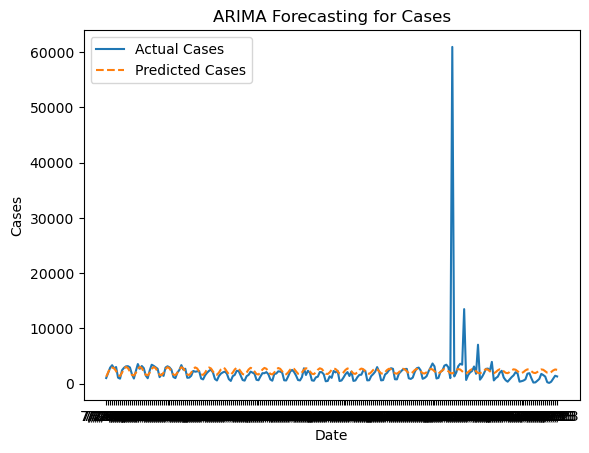

R2 Score for Cases: 0.002721994676161077


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

# Assuming you have your COVID-19 data loaded into the DataFrame 'world_cases' and 'world_deaths'

# Corrected code for daily cases
count_cases = []
for i in range(2, len(df_cases)):
    cases = sum(pd.to_numeric(df_cases.iloc[i, 1:].values))
    count_cases.append(cases)

count_deaths = []
for i in range(2, len(df_deaths)):
    deaths = sum(pd.to_numeric(df_deaths.iloc[i, 1:].values))
    count_deaths.append(deaths)

# Create world_cases and world_deaths DataFrames
world_cases = pd.DataFrame({"Date": df_cases.iloc[2:, 0], "Cases": count_cases})
world_deaths = pd.DataFrame({"Date": df_deaths.iloc[2:, 0], "Deaths": count_deaths})

# Merge world_cases and world_deaths on "Date"
world_data = pd.merge(world_cases, world_deaths, on="Date")

# Split data into train and test sets
train_data, test_data = train_test_split(world_data, test_size=0.2, shuffle=False)

# Hyperparameter tuning for cases
auto_arima_cases = auto_arima(train_data["Cases"], seasonal=False, trace=True)

# Train the ARIMA model for cases with the best hyperparameters
best_order_cases = auto_arima_cases.order
model_cases = ARIMA(train_data["Cases"], order=best_order_cases)
model_cases_fit = model_cases.fit()

# Hyperparameter tuning for deaths
auto_arima_deaths = auto_arima(train_data["Deaths"], seasonal=False, trace=True)

# Train the ARIMA model for deaths with the best hyperparameters
best_order_deaths = auto_arima_deaths.order
model_deaths = ARIMA(train_data["Deaths"], order=best_order_deaths)
model_deaths_fit = model_deaths.fit()

# Forecasting for cases
forecast_period_cases = len(test_data)
forecast_values_cases = model_cases_fit.forecast(steps=forecast_period_cases)

# Plotting
plt.plot(test_data["Date"], test_data["Cases"], label='Actual Cases')
plt.plot(test_data["Date"], forecast_values_cases, label='Predicted Cases', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('ARIMA Forecasting for Cases')
plt.legend()
plt.show()


# Evaluation
r2_cases = r2_score(test_data["Cases"], forecast_values_cases)
print("R2 Score for Cases:", r2_cases)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15755.068, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.594, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16266.411, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16268.595, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16025.452, Time=1.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15971.086, Time=1.87 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15694.216, Time=2.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15909.141, Time=1.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=15541.056, Time=2.62 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=15820.883, Time=1.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=15402.261, Time=3.35 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=15605.044, Time=1.24 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=15410.542, Time=3.70 sec
 ARIMA(4,1,3)(0,0,0

C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\meggn\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

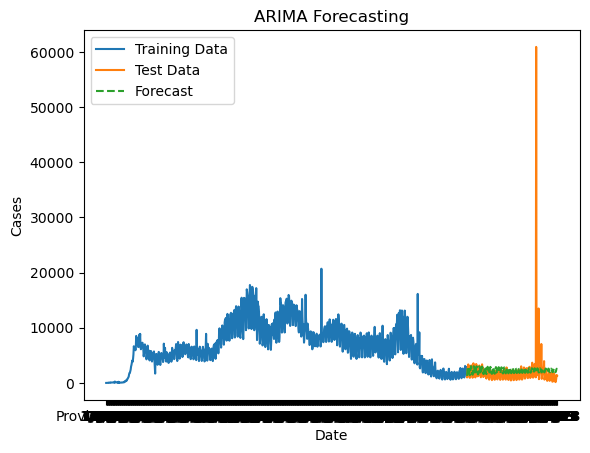

R2 Score: 0.0030433088712231715


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima

# Assuming you have your COVID-19 data loaded into the DataFrame 'df_cases' and 'df_deaths'

# Corrected code for daily cases
count_cases = []
for i in range(1, len(df_cases)):
    numeric_values = pd.to_numeric(df_cases.iloc[i, 1:], errors='coerce')  # Convert to numeric, replace non-numeric with NaN
    numeric_values = numeric_values.dropna()  # Drop NaN values
    count_cases.append(numeric_values.sum())  # Sum only numeric values

df_cases_daily = pd.DataFrame()
df_cases_daily["Date"] = df_cases.iloc[1:, 0]  # Assuming the first column contains dates
df_cases_daily["Cases"] = count_cases
df_cases_daily = df_cases_daily.set_index("Date")

# Split data into train and test sets
train_data, test_data = train_test_split(df_cases_daily, test_size=0.2, shuffle=False)

# Hyperparameter tuning
auto_arima_model = auto_arima(train_data, seasonal=False, trace=True)

# Train the ARIMA model with the best hyperparameters
best_order = auto_arima_model.order
model = ARIMA(train_data, order=best_order)
model_fit = model.fit()

# Forecasting
forecast_period = len(test_data)
forecast_values = model_fit.forecast(steps=forecast_period)

# Plotting
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(test_data.index, forecast_values, label='Forecast', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

# Evaluation
r2 = r2_score(test_data, forecast_values)
print("R2 Score:", r2)
 

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Assuming you have a DataFrame named world_cases with columns 'Date' and 'Cases'

# Assuming your 'Date' column is of datetime type, if not, convert it
# world_cases['Date'] = pd.to_datetime(world_cases['Date'])

# Extracting features and target variable
X = np.array(world_cases.index).reshape(-1, 1)  # Assuming the index represents the date as numeric values
y = world_cases['Cases'].values

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models initialization
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42)
}

# Training and evaluation
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Finding the best model
best_model = max(results, key=results.get)

print("R-squared values:")
for name, r2 in results.items():
    print(f"{name}: {r2}")

print(f"\nThe best model is: {best_model} with R-squared value of {results[best_model]}")

# Predicting values for the next 30 days using the best model
best_model_instance = models[best_model]
future_dates = np.array(range(len(world_cases), len(world_cases) + 30)).reshape(-1, 1)
future_predictions = best_model_instance.predict(future_dates)

# Printing the future predictions
print("\nFuture predictions for the next 30 days:")
for i, pred in enumerate(future_predictions):
    print(f"Day {i+1}: {pred}")


R-squared values:
Linear Regression: -0.011058330578216147
Decision Tree Regression: 0.37587654223471856
Random Forest Regression: 0.4176927356402138

The best model is: Random Forest Regression with R-squared value of 0.4176927356402138

Future predictions for the next 30 days:
Day 1: 980.82
Day 2: 1143.18
Day 3: 1143.18
Day 4: 1143.18
Day 5: 1143.18
Day 6: 1143.18
Day 7: 1143.18
Day 8: 1143.18
Day 9: 1143.18
Day 10: 1143.18
Day 11: 1143.18
Day 12: 1143.18
Day 13: 1143.18
Day 14: 1143.18
Day 15: 1143.18
Day 16: 1143.18
Day 17: 1143.18
Day 18: 1143.18
Day 19: 1143.18
Day 20: 1143.18
Day 21: 1143.18
Day 22: 1143.18
Day 23: 1143.18
Day 24: 1143.18
Day 25: 1143.18
Day 26: 1143.18
Day 27: 1143.18
Day 28: 1143.18
Day 29: 1143.18
Day 30: 1143.18


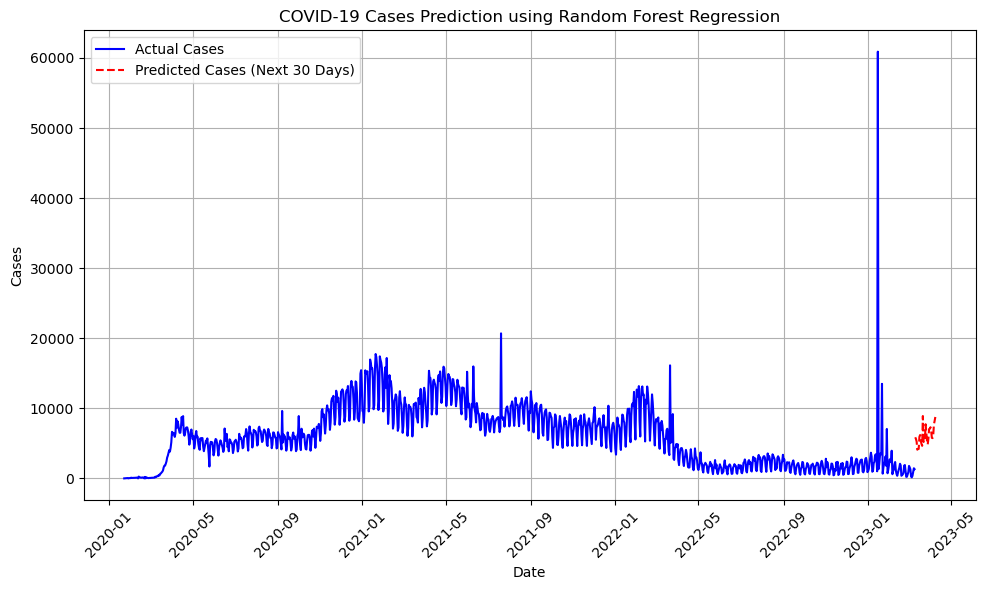

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a DataFrame named world_cases with columns 'Date' and 'Cases'

# Convert 'Date' column to datetime type
world_cases['Date'] = pd.to_datetime(world_cases['Date'])

# Extracting features and target variable
X = world_cases['Date'].dt.dayofyear.values.reshape(-1, 1)  # Using day of year as numeric feature
y = world_cases['Cases'].values

# Model initialization
model = RandomForestRegressor(random_state=42)

# Fitting the model
model.fit(X, y)

# Predicting values from the last date in the data
last_date = world_cases['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_dates_numeric = future_dates.dayofyear.values.reshape(-1, 1)
future_predictions = model.predict(future_dates_numeric)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(world_cases['Date'], world_cases['Cases'], color='blue', label='Actual Cases')
plt.plot(future_dates, future_predictions, color='red', linestyle='--', label='Predicted Cases (Next 30 Days)')
plt.title('COVID-19 Cases Prediction using Random Forest Regression')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


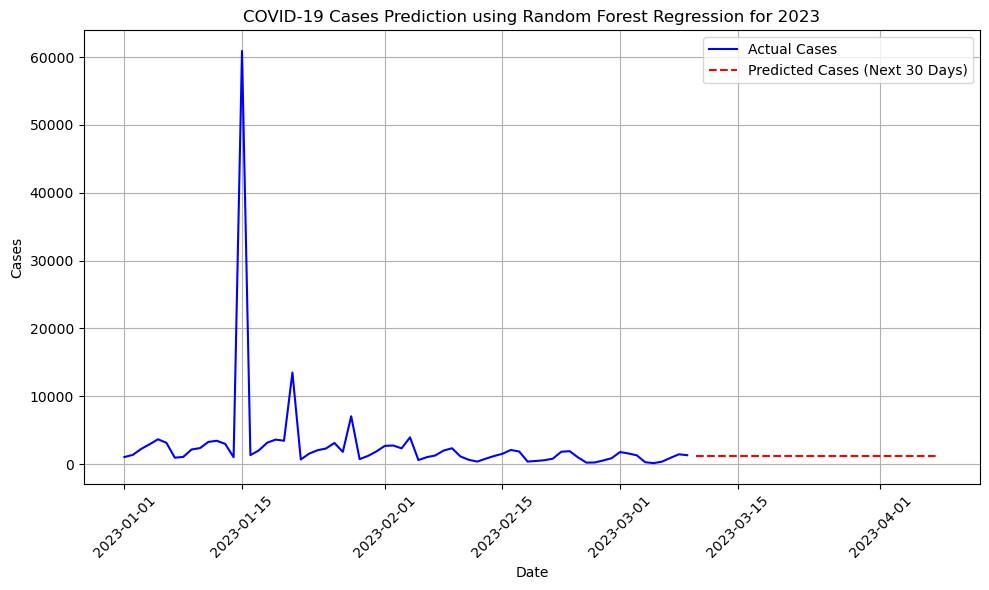

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a DataFrame named world_cases with columns 'Date' and 'Cases'

# Convert 'Date' column to datetime type
world_cases['Date'] = pd.to_datetime(world_cases['Date'])

# Filter data for the year 2023
world_cases_2023 = world_cases[(world_cases['Date'] >= '2023-01-01') & (world_cases['Date'] <= '2023-12-31')]

# Extracting features and target variable
X = world_cases_2023['Date'].dt.dayofyear.values.reshape(-1, 1)  # Using day of year as numeric feature
y = world_cases_2023['Cases'].values

# Model initialization
model = RandomForestRegressor(random_state=42)

# Fitting the model
model.fit(X, y)

# Predicting values from the last date in the data
last_date = world_cases_2023['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_dates_numeric = future_dates.dayofyear.values.reshape(-1, 1)
future_predictions = model.predict(future_dates_numeric)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(world_cases_2023['Date'], world_cases_2023['Cases'], color='blue', label='Actual Cases')
plt.plot(future_dates, future_predictions, color='red', linestyle='--', label='Predicted Cases (Next 30 Days)')
plt.title('COVID-19 Cases Prediction using Random Forest Regression for 2023')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


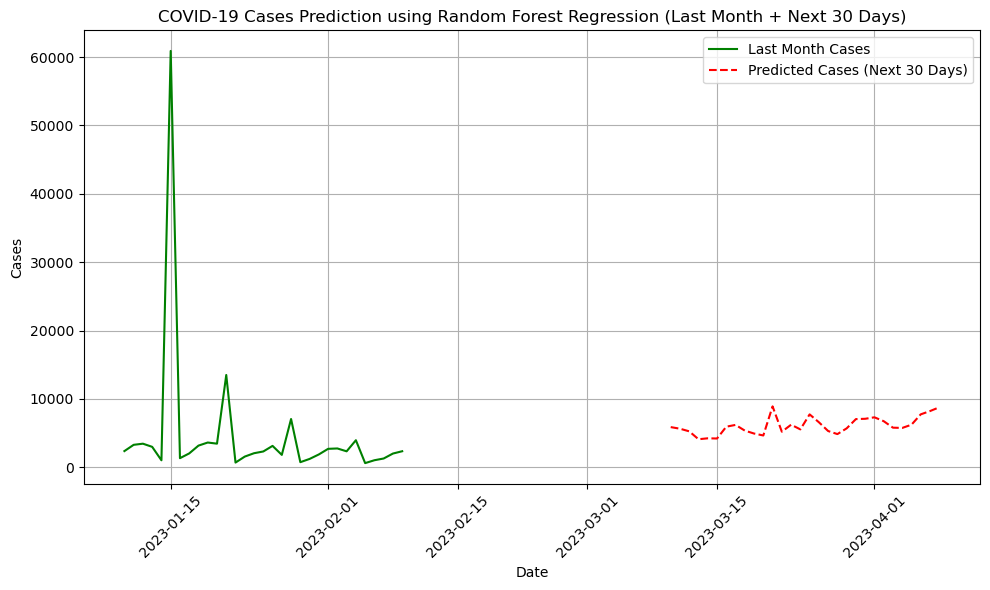

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Assuming you have a DataFrame named world_cases with columns 'Date' and 'Cases'

# Convert 'Date' column to datetime type
world_cases['Date'] = pd.to_datetime(world_cases['Date'])

# Extracting features and target variable
X = world_cases['Date'].dt.dayofyear.values.reshape(-1, 1)  # Using day of year as numeric feature
y = world_cases['Cases'].values

# Model initialization
model = RandomForestRegressor(random_state=42)

# Fitting the model
model.fit(X, y)

# Predicting values for the next 30 days
future_dates = pd.date_range(start=world_cases['Date'].max() + pd.Timedelta(days=1), periods=30)
future_dates_numeric = future_dates.dayofyear.values.reshape(-1, 1)
future_predictions = model.predict(future_dates_numeric)

# Getting the last month's data
last_month_end = world_cases['Date'].max() - pd.DateOffset(months=1)
last_month_start = last_month_end - pd.DateOffset(days=30)
last_month_data = world_cases[(world_cases['Date'] >= last_month_start) & (world_cases['Date'] <= last_month_end)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(last_month_data['Date'], last_month_data['Cases'], color='green', label='Last Month Cases')
plt.plot(future_dates, future_predictions, color='red', linestyle='--', label='Predicted Cases (Next 30 Days)')
plt.title('COVID-19 Cases Prediction using Random Forest Regression (Last Month + Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
